# **Regresión lineal: cálculo de la prima del seguro**

Objetivo: Encontrar el mejor modelo de entrenamiento para calcular la prima del seguro. La prima se recoge en una columna llamada **charges** de un dataset con los datos siguientes: edad, sexo, índice de masa corporal, número de hijos, región y si la persona es fumadora o no. **charges** es la columna que se va a **predecir**.

Fuente del dataset: Turing, en ~/SHARED/datasets/insurance/insurance.csv

### *Paloma Mareque Martínez*
---

## Inicio

Empezamos importando los módulos necesarios. En primer lugar, vamos a importar algunos módulos comunes, asegurarnos de que MatplotLib traza las figuras correctamente y preparar una función para guardar las figuras. También comprobamos que Python 3.5 o posterior está instalado (aunque Python 2.x puede funcionar, está obsoleto por lo que es **altamente** recomendable utilizar Python 3 en su lugar), así como Scikit-Learn ≥0.20.

In [2]:
# Se requiere Python ≥ 3.5
import sys;
assert sys.version_info >= (3, 5);

# Se requiere Scikit-Learn ≥ 0.20
import sklearn;
assert sklearn.__version__ >= "0.20";

# Otros imports
import numpy as np;
import os;

# la línea que sigue, sólo en Colab ...
%matplotlib inline

import matplotlib as mpl;
import matplotlib.pyplot as plt;

# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=14);
mpl.rc('xtick', labelsize=12);
mpl.rc('ytick', labelsize=12);

## Obteniendo los datos

### Importamos la librería de pandas para leer el fichero *insurance.csv* :

In [4]:
# solo en Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd;

# se lee el fichero csv
# ruta para trabajar en colab ->/content/drive/MyDrive/Colab Notebooks/SAA/seguros/insurance.csv
seguro = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SAA/seguros/insurance.csv");
seguro

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


### Podemos visualizar las 5 primeras filas de datos con *head()*

In [ ]:
seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


### Información del dataset

Hay 1338 filas de datos de 3 tipos:
- float64
- int64
- object

Las columnas **age**(edad), **bmi** (índice masa corporal) y **smoker**(persona fumadora) tienen **valores nulos**. Por ello más adelante vamos a limpiar los datos.

In [ ]:
seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


#### El método *describe()* realiza un análisis estadístico de los datos: media, desviación típica(std), cuartiles, datos mínimos y máximos.

In [ ]:
seguro.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1338.000000,1338.000000
mean,39.208676,30.664589,1.094918,13270.422265
std,14.055088,6.100313,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Representando los datos

Los histogramas indican cuántas veces aparece un elemento en un conjunto de datos.
El método *hist* usa el *pyplot* de la librería *matplotlib* para representar histogramas con los que visualizar los datos. Se le pasa el ancho de las columnas y el tamaño de la gráfica.

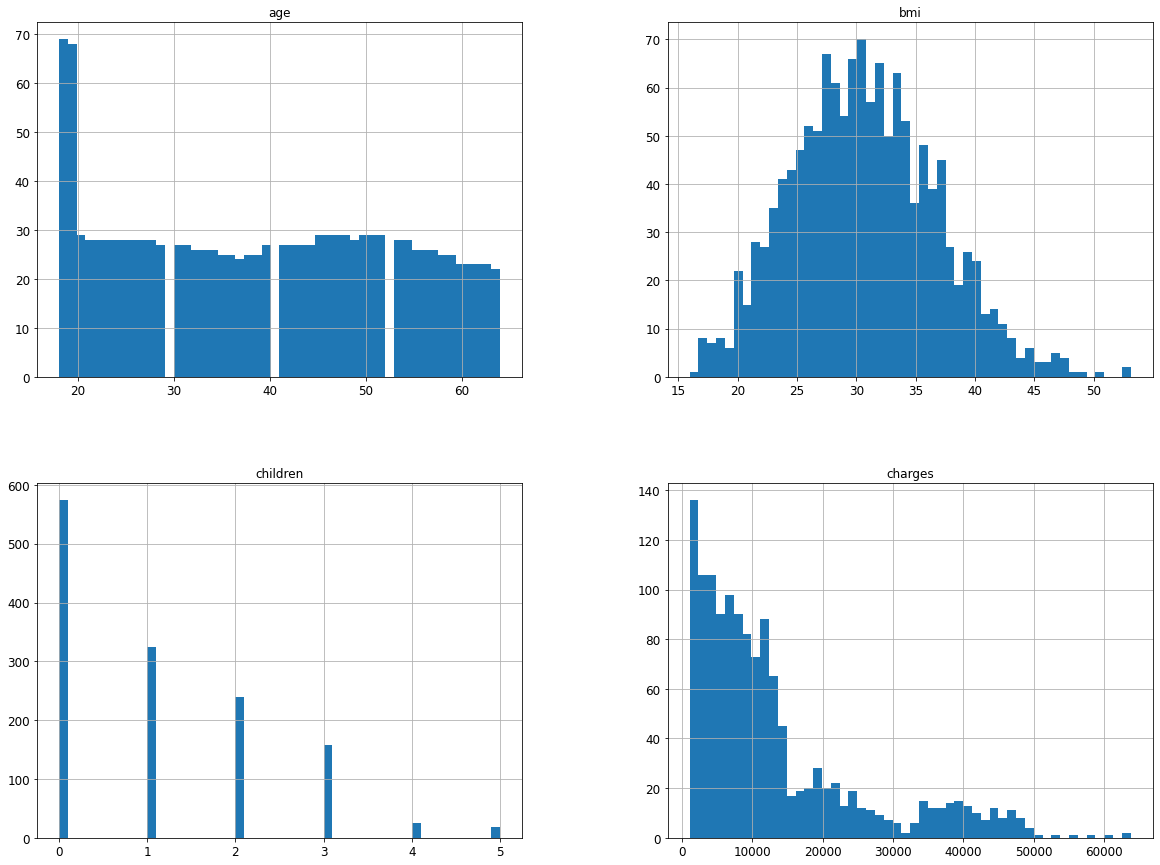

In [ ]:
seguro.hist(bins=50, figsize=(20,15));

La mayoría de personas no tienen hijos o tienen entre 1 y 3. El histograma de **charges** indica que la gran mayoría de las primas de seguro no superan los 20.000, por eso la media total calculada antes con el método *describe* sea 13.270'422265.

## Visualizando datos

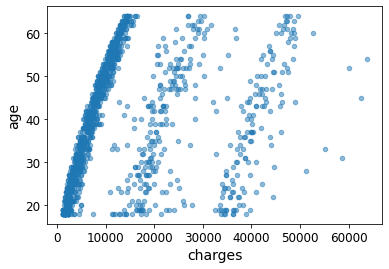

In [27]:
seguro.plot(kind="scatter", x="charges", y="age", alpha=0.5);

Analizando esta gráfica podemos decir que cuanto mayor sea la edad del cliente, mayor será la prima del seguro. En el siguiente apartado se muestra esta conclusión al buscar la correlación entre la columna de la prima de seguro respecto al resto de columnas, dando como resultado la correlación más alta con la columna **age**.

## Buscando correlaciones

### Las correlaciones buscan la relación entre columnas del dataset. La relación entre una columna consigo misma siempre va a ser la más alta(1.000000).

In [35]:
corr_matrix=seguro.corr()
corr_matrix

,age,bmi,children,charges
age,1.000000,0.109616,0.042376,0.299102
bmi,0.109616,1.000000,0.012585,0.198730
children,0.042376,0.012585,1.000000,0.067998
charges,0.299102,0.198730,0.067998,1.000000


Correlación columna **charges** y resto columnas:

In [36]:
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
age         0.299102
bmi         0.198730
children    0.067998
Name: charges, dtype: float64

La columna que indica la edad (**age**) es la que más correlación tiene con la columna a predecir (**charges**), un 0'29%.

Con el submódulo *plotting* del módulo *pandas* se puede visualizar una matriz de gráficos de dispersión cruzando las características cuantitativas del dataframe. En la diagonal de la matriz se representan los histogramas.

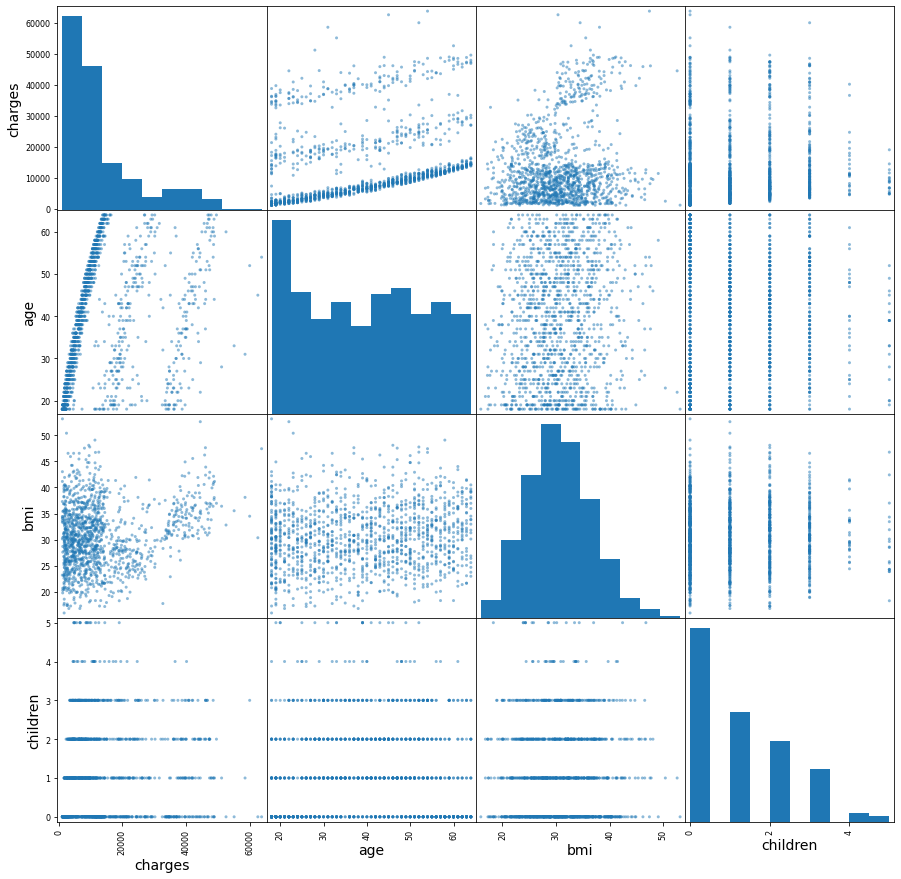

In [37]:
from pandas.plotting import scatter_matrix;

attributes=["charges","age","bmi","children"];


scatter_matrix(seguro[attributes], figsize=(15,15));

# Preparando los datos para LOS algoritmos de aprendizaje automático

## Limpiando los datos

A continuación se muestran todas las filas con algún valor nulo(NaN), de las cuales 3(**age**,**bmi**,**smoker**) tienen nulos.



In [38]:
sample_incomplete_rows=seguro[seguro.isnull().any(axis=1)] 
sample_incomplete_rows.head()

,age,sex,bmi,children,smoker,region,charges
681,19.0,male,20.3,0,NaN,southwest,1242.2600
750,NaN,female,26.4,0,yes,southeast,19539.2430
1337,61.0,female,NaN,0,yes,northwest,29141.3603


Para las columnas de tipo numérico(**bmi** y **age**) se van a sustituír los datos nulos por la mediana.



In [39]:
median = seguro["bmi"].median();
seguro["bmi"].fillna(median, inplace=True)

median = seguro["age"].median();
seguro["age"].fillna(median, inplace=True)


Comprobamos que las columnas **bmi** y **age** ya no tienen datos nulos:

In [40]:
seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


## Gestionando los atributos categóricos o de tipo texto


Primero vamos a limpiar los nulos de la columna categórica **smoker**. Para ello se necesita crear tantas columnas como categorías haya y realizar algunos cambios y cálculos.

Cuando ya no queden nulos será necesario dividir las columnas **sex** y **region**, también de tipo texto, en varias columnas en función del número de categorías de cada una.

In [41]:
seguro_cat = seguro[ ["smoker"] ]

seguro_cat

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


En la fila 681 del dataset hay un nulo:

In [42]:
sample_incomplete_rows=seguro[seguro.isnull().any(axis=1)] 
sample_incomplete_rows.head()

,age,sex,bmi,children,smoker,region,charges
681,19.0,male,20.3,0,NaN,southwest,1242.26


Con el método *OneHotEncoder* se automatiza el crear tantas columnas como categorías haya. El resultado final serán 3 columnas: *yes*, *no* y *NaN*.

In [43]:
from sklearn.preprocessing import OneHotEncoder;

# sparse=False para evitar como matriz resultante una matriz con una mayoría de ceros(matriz dispersa).
cat_encoder = OneHotEncoder(sparse=False);
seguro_cat_1hot = cat_encoder.fit_transform(seguro_cat)

seguro_cat_1hot

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

Una vez aplicado el *fit* y el *transform* para crear las 3 columnas resultantes, se añaden al dataset, se elimina la columna de partida *smoker* y se renombran las columnas.

In [44]:
backup = seguro.copy();

seguro.reset_index(drop=False, inplace=True);

#juntar columnas
seguro = seguro.join(pd.DataFrame(seguro_cat_1hot, columns=[cat for cat in cat_encoder.categories_[0]]))
seguro=seguro.drop(["smoker"], axis=1);
seguro=seguro.rename(columns={"no":"Non smoker", "yes":"Smoker"});
seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       1338 non-null   int64  
 1   age         1338 non-null   float64
 2   sex         1338 non-null   object 
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   Non smoker  1338 non-null   float64
 8   Smoker      1338 non-null   float64
 9   nan         1338 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 104.7+ KB


La columna *NaN* sigue teniendo la fila 681 con el valor 1, que representa el último valor nulo que queda en el dataset. Para solucionarlo hacemos los  siguientes tres pasos:

In [45]:
seguro.iloc[681]

index               681
age                19.0
sex                male
bmi                20.3
children              0
region        southwest
charges         1242.26
Non smoker          0.0
Smoker              0.0
NaN                 1.0
Name: 681, dtype: object

**1º** calcular mediana de *Smoker*

In [46]:
median = seguro["Smoker"].median();
median

0.0

**2º** La mediana es 0, por lo tanto en la fila 681 de la columna *Non Smoker* ponemos un 1.

Con *at* accedemos a un solo valor del dataset, indicando el índice y el nombre de la columna.

In [47]:
seguro.at[681,"Non smoker"]

0.0

In [48]:
seguro.at[681,"Non smoker"] = 1
seguro.at[681,"Non smoker"]

1.0

El valor de la fila ha cambiado.

In [49]:
seguro.iloc[681]

index               681
age                19.0
sex                male
bmi                20.3
children              0
region        southwest
charges         1242.26
Non smoker          1.0
Smoker              0.0
NaN                 1.0
Name: 681, dtype: object

**3º** Ahora ya podemos eliminar la columna de nulos *NaN*:

In [50]:
seguro=seguro.drop(seguro.columns[9], axis=1)
seguro

,index,age,sex,bmi,children,region,charges,Non smoker,Smoker
0,0,19.0,female,27.900,0,southwest,16884.92400,0.0,1.0
1,1,18.0,male,33.770,1,southeast,1725.55230,1.0,0.0
2,2,28.0,male,33.000,3,southeast,4449.46200,1.0,0.0
3,3,33.0,male,22.705,0,northwest,21984.47061,1.0,0.0
4,4,32.0,male,28.880,0,northwest,3866.85520,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,1333,50.0,male,30.970,3,northwest,10600.54830,1.0,0.0
1334,1334,18.0,female,31.920,0,northeast,2205.98080,1.0,0.0
1335,1335,18.0,female,36.850,0,southeast,1629.83350,1.0,0.0
1336,1336,21.0,female,25.800,0,southwest,2007.94500,1.0,0.0


In [51]:
backup = seguro.copy();

### Aplicamos el método *OneHotEncoder* a las columnas **sex** y **region**

In [52]:
sex_cat = seguro[ ["sex"] ]

sex_cat

,sex
0,female
1,male
2,male
3,male
4,male
...,...
1333,male
1334,female
1335,female
1336,female


In [53]:
region_cat = seguro[ ["region"] ]

region_cat.value_counts() # 4 tipos de region: southeast,northwest,southwest,northeast
region_cat

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


COLUMNA **sex**-> resultado: 2 nuevas columnas **male** y **female**.

In [54]:
from sklearn.preprocessing import OneHotEncoder;

cat_encoder = OneHotEncoder(sparse=False);
sex_cat_1hot = cat_encoder.fit_transform(sex_cat)

sex_cat_1hot

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Con *join()* se añaden las 2 nuevas columnas al dataset y con *drop()* se elimina la columna de partida sex.


In [55]:
backup = seguro.copy();

seguro.reset_index(drop=False, inplace=True);

seguro = seguro.join(pd.DataFrame(sex_cat_1hot, columns=[cat for cat in cat_encoder.categories_[0]]))
seguro=seguro.drop(["sex"], axis=1);
seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     1338 non-null   int64  
 1   index       1338 non-null   int64  
 2   age         1338 non-null   float64
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   Non smoker  1338 non-null   float64
 8   Smoker      1338 non-null   float64
 9   female      1338 non-null   float64
 10  male        1338 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 115.1+ KB


COLUMNA **region** -> resultado: 4 nuevas columnas **northeast**, **northwest**, **southeast** y **southwest**.

In [56]:
from sklearn.preprocessing import OneHotEncoder;

cat_encoder = OneHotEncoder(sparse=False);
region_cat_1hot = cat_encoder.fit_transform(region_cat)

region_cat_1hot
#  4 categorías de region, 4 nuevas columnas

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [64]:
#backup = seguro.copy();

#seguro.reset_index(drop=False, inplace=True);

#juntar columnas
#seguro = seguro.join(pd.DataFrame(region_cat_1hot, columns=[cat for cat in cat_encoder.categories_[0]]))
#seguro=seguro.drop(["region"], axis=1);
#seguro = seguro.drop(["level_0"],axis=1);
#seguro.info()
backup = seguro.copy();
seguro

,index,age,bmi,children,charges,Non smoker,Smoker,female,male,northeast,northwest,southeast,southwest
0,0,19.0,27.900,0,16884.92400,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,18.0,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,28.0,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3,33.0,22.705,0,21984.47061,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4,32.0,28.880,0,3866.85520,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,50.0,30.970,3,10600.54830,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1334,1334,18.0,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,1335,18.0,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,1336,21.0,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [65]:
seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       1338 non-null   int64  
 1   age         1338 non-null   float64
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   charges     1338 non-null   float64
 5   Non smoker  1338 non-null   float64
 6   Smoker      1338 non-null   float64
 7   female      1338 non-null   float64
 8   male        1338 non-null   float64
 9   northeast   1338 non-null   float64
 10  northwest   1338 non-null   float64
 11  southeast   1338 non-null   float64
 12  southwest   1338 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 136.0 KB


#### Ahora los datos sí están listos para el entrenamiento y el test. 

# Seleccionando y entrenando los modelos

## Creamos el Train y Test Set

Con la función *seed* plantamos una "semilla" para hacer que el proceso siguiente sea repetible. Una semilla es un número aleatorio utilizado para inicializar un generador de números pseudoaleatorios. Esta función se encuentra en la librería random de numpy (np).

In [66]:
np.random.seed(42);

In [67]:
def split_train_test(data, test_ratio):
    # se calcula el tamaño del conjunto de testeo multiplicando el total por el ratio
    test_set_size = int(len(seguro)*test_ratio);
    # permutation baraja los indices del dataframe y devuelve una lista de los elementos permutados
    shuffle_indices = np.random.permutation(len(data));
    test_indices = shuffle_indices[:test_set_size];
    train_indices = shuffle_indices[test_set_size:];
    # de data devuelve las filas que corresponden con los indices train_indices
    return data.iloc[train_indices], data.iloc[test_indices];


In [68]:
X_train, X_test = split_train_test(seguro, 0.20);

len(X_train),len(X_test)

(1071, 267)

Hacemos una copia de la columna *charges* para no perder los datos a predecir, que va a ser la 'y' de entrenamiento, y la eliminamos del X_train.

In [69]:
y_train = X_train["charges"].copy();
X_train = X_train.drop("charges", axis=1);

Dataframe sin columna *charges* y los índices permutados:

In [70]:
X_train.head()

,index,age,bmi,children,Non smoker,Smoker,female,male,northeast,northwest,southeast,southwest
846,846,51.0,34.20,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
560,560,46.0,19.95,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,1285,47.0,24.32,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,1142,52.0,24.86,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,969,39.0,34.32,5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### Modelo LinearRegression

*lin_reg* es el modelo que se va a entrenar.

In [71]:
from sklearn.linear_model import LinearRegression;


lin_reg = LinearRegression();
# el modelo aprende con el método fit
lin_reg.fit(X_train, y_train)

LinearRegression()

#### Generamos las prediciones y las comparamos con 5 valores reales:


In [72]:
some_data = X_train.iloc[:5]
pred=lin_reg.predict(some_data)
print("Predictions:", pred)

Predictions: [12401.17356277  7023.49562733  8661.62691081  9403.53796207
 11261.57347456]


Error cuadrático medio:
$$ MSE = \frac{1}{n}∑_{i=1}^{n}{(y_i-y_i')}^2 $$

In [73]:
from sklearn.metrics import mean_squared_error;

predictions = lin_reg.predict(X_train);
lin_mse = mean_squared_error(y_train, predictions);
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6101.267410121104

Error absoluto medio:
$$ MAE = \frac{1}{n}∑_{i=1}^{n}{|y_i-y_i'|} $$

In [74]:
from sklearn.metrics import mean_absolute_error;
# predictions

lin_mae = mean_absolute_error(y_train, predictions);
lin_mae

4200.543851013067

El error absoluto medio (*MAE*) es menor que el error cuadrático medio (*MSE*), por lo cual es un mejor estimador.

#### Modelo Decision Tree Regressor: calcula la regresión utilizando arboles de decisión.

In [75]:
from sklearn.tree import DecisionTreeRegressor;

tree_reg = DecisionTreeRegressor();
# el modelo aprende con el método fit
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

El modelo predice sobre todas las X. El resultado es 0.0, lo que significa que este modelo ha sobreaprendido.

In [76]:
predictions = tree_reg.predict(X_train);
tree_mse = mean_squared_error(y_train, predictions);
tree_rmse = np.sqrt(tree_mse);
tree_rmse



0.0

## Mejorando la evaluación por medio de la validación cruzada

In [77]:
# entrena con unos datos pero los valida con otros que no ve
from sklearn.model_selection import cross_val_score;

# le pasamos el modelo de árbol de decisión que hemos entrenado, las X, las Y, y el tipo de validación(scoring) que vamos a utilizar
scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores=np.sqrt(-scores)
tree_rmse_scores

array([6081.48899604, 6435.57278636, 5913.21472932, 6418.00141364,
       6285.27250281, 5312.52894522, 7997.20570253, 6647.28386202,
       7363.81776465, 7148.50872346])

In [78]:
def display_scores(scores):
    print(f"Scores: {scores}");
    print(f"Mean: {scores.mean()}");
    print(f"Standard deviation: {scores.std()}");
    
display_scores(tree_rmse_scores);

Scores: [6081.48899604 6435.57278636 5913.21472932 6418.00141364 6285.27250281
 5312.52894522 7997.20570253 6647.28386202 7363.81776465 7148.50872346]
Mean: 6560.289542604636
Standard deviation: 733.5020320008693


Le pasamos el modelo de regresión lineal que hemos entrenado, las X, las y, y el tipo de validación(scoring) que vamos a utilizar:

In [79]:
scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores=np.sqrt(-scores)
lin_rmse_scores

array([6049.73006499, 6626.75159227, 5226.939215  , 6076.36546583,
       5822.3622088 , 6111.3919269 , 7279.27818832, 6307.74209444,
       6248.12761218, 5645.5846269 ])

Calculamos la media de la validación cruzada del modelo Linear Regressor para comparar con Decision Tree Regressor:

In [80]:
display_scores(lin_rmse_scores)

Scores: [6049.73006499 6626.75159227 5226.939215   6076.36546583 5822.3622088
 6111.3919269  7279.27818832 6307.74209444 6248.12761218 5645.5846269 ]
Mean: 6139.427299561496
Standard deviation: 525.9985147774804


Los resultados obtenidos utilizando el modelo de árboles de decisión son peores(media = 6560.2395) que los del modelo Linear Regressor(media= 6139.4272).

#### Modelo RandomForest Regressor: 

Este modelo funciona como un ensamblado de varios árboles de decisión.

In [81]:
from sklearn.ensemble import RandomForestRegressor;

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42);
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [82]:
predictions = forest_reg.predict(X_train);
forest_mse = mean_squared_error(y_train, predictions);
forest_rmse = np.sqrt(forest_mse);
forest_rmse

1808.6653350138758

Evaluando con validación cruzada:

In [83]:
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores=np.sqrt(-forest_scores);
display_scores(forest_rmse_scores)

Scores: [4655.44921749 4969.74068614 3766.21760343 4347.08484659 4906.72186163
 4708.84808982 6128.94274533 5379.31807087 5065.98839945 4672.15469735]
Mean: 4860.04662181192
Standard deviation: 591.2681088246306


El resultado de la media del modelo RandomForest, menor que en los modelos anteriores, es de aprox. 4860.05 de prima. Es un buen estimador.

#### Modelo SVR (Support Vector Regressor)

In [84]:
from sklearn.svm import SVR;

svm_reg = SVR(kernel="linear");
svm_reg.fit(X_train, y_train);
predictions = svm_reg.predict(X_train);
svm_mse = mean_squared_error(y_train, predictions);
svm_rmse = np.sqrt(svm_mse);
svm_rmse

12791.545354691656

Aplicando validación cruzada:

In [85]:
svm_scores = cross_val_score(svm_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores=np.sqrt(-svm_scores);
display_scores(svm_rmse_scores)

Scores: [13062.48933592 12587.72868644 12566.61555303 15087.05705215
 12908.04871446 10550.79712576 13105.51307957 12527.45714468
 12899.04073312 12339.23141473]
Mean: 12763.397883986445
Standard deviation: 1041.440520283765


Los resultados obtenidos no son mejores que en los anteriores modelos. Continuamos probando el modelo XGBoost.

#### Modelo XGBoost

El modelo XGBoost suele obtener buenos resultados de predicción con relativamente poco esfuerzo, en muchos casos equiparables o mejores que los devueltos por modelos más complejos computacionalmente, en particular para problemas con datos heterogéneos, como es el caso.

In [86]:
import xgboost as xgb;

xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42);

xgb_reg.fit(X_train, y_train);
predictions = xgb_reg.predict(X_train);
xgb_mse = mean_squared_error(y_train, predictions);
xgb_rmse = np.sqrt(xgb_mse);
xgb_rmse

3775.2581813555653

In [88]:
xgb_scores = cross_val_score(xgb_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores=np.sqrt(-xgb_scores);
display_scores(xgb_rmse_scores)

Scores: [4560.90682506 4859.96901092 3476.87220047 3842.68652048 4690.30773161
 4634.02226328 5717.98099873 5128.21049484 4726.55568045 4623.63720792]
Mean: 4626.114893375887
Standard deviation: 587.5379090550465


 
La media de la validación cruzada de XGBoost ha sido el mejor resultado de todos los modelos, superando la media del modelo Random Forest. Siendo similar al modelo Random Forest, XGBoost se va construyendo secuencialmente en vez de paralelamente. Se debe a que el refuerzo es un aprendizaje iterativo, lo que significa que el modelo predice algo inicialmente y autoanaliza sus errores como un algoritmo de predicción y da más peso a los puntos de datos en los que hizo una predicción errónea en la siguiente iteración. Ese aprendizaje inicial se consigue aplicando el descenso de gradiente (de ahí su nombre eXtremeGradientBoost). 

Un modelo de este tipo, que evita que se produzcan predicciones al azar, es fiable la mayoría de las veces. 

Finalmente se realiza el test con el modelo que ha dado un mejor resultado, XGBoost:

In [89]:
y_test= X_test["charges"].copy()
X_test = X_test.drop("charges", axis=1)

In [90]:
final_predictions = xgb_reg.predict(X_test);
final_mse = mean_squared_error(y_test, final_predictions);
final_rmse =np.sqrt(final_mse);
final_rmse

4407.903300931473